In [25]:
data_dir = "/Volumes/KeithSSD/ChesapeakeMicrobiome/data/environmental_raw_data"

orig_data0 <- as.data.frame(read.delim(paste(data_dir, 'merged_paired_water_quality_data.txt', sep="/"), row.names=1))

orig_data0$WCP = as.integer(orig_data0$WaterColumnPosition) - 1
orig_data0$PAR60 = orig_data0$measurement_PAR.60
orig_data0$Season = orig_data0$FallPeak
orig_data0$Sal = orig_data0$SALINITY
req_cols = c('WCP', 'PAR60', 'Season', 'Sal', 'DO', 'PO4F', 'NO2F', 'Latitude', 'LinearTime', 'CHLA')
orig_data1 = orig_data0[,req_cols]
orig_data1 = orig_data1[complete.cases(orig_data1),]
orig_data1[,req_cols[2:9]] <- scale(orig_data1[,req_cols[2:9]])
orig_data2 <- orig_data1[with(orig_data1, order(LinearTime, Latitude, WCP)),]
str(orig_data2)

'data.frame':	230 obs. of  10 variables:
 $ WCP       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ PAR60     : num  -0.336 -0.336 -0.336 -0.336 -0.336 ...
 $ Season    : num  0.0601 0.063 0.063 0.0643 0.0643 ...
 $ Sal       : num  2.05 0.544 0.544 1.202 0.266 ...
 $ DO        : num  0.45964 -0.29086 -0.29086 0.00483 -0.58075 ...
 $ PO4F      : num  -0.403 -0.262 -0.262 -0.11 -0.274 ...
 $ NO2F      : num  -0.409 -0.291 -0.291 -0.38 -0.155 ...
 $ Latitude  : num  -1.5638 -0.2764 -0.2764 -0.9784 0.0431 ...
 $ LinearTime: num  -1.57 -1.57 -1.57 -1.57 -1.57 ...
 $ CHLA      : num  1.37 1.33 1.33 1.6 1.71 ...


[1] 33.05311

[1] 0.3787909

,DO_residuals,DO
DO_residuals,1.0000000,0.4580851
DO,0.4580851,1.0000000


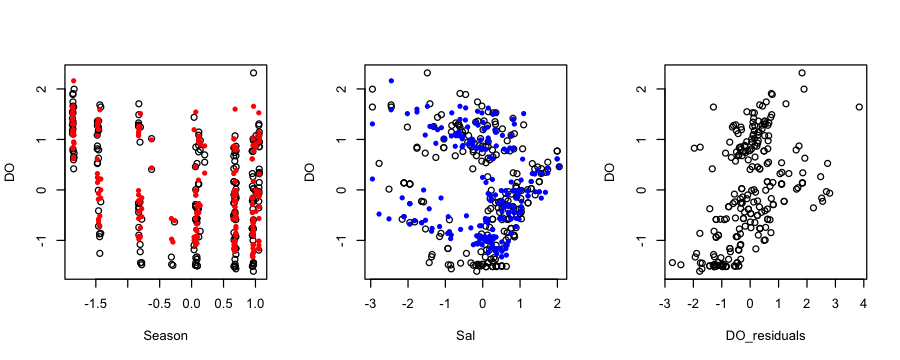

In [32]:
loessMod <- suppressWarnings(loess(DO ~ PAR60+WCP+Latitude, data=orig_data2, span=0.75))
sum(loessMod$residuals^2)
sd(loessMod$residuals)
orig_data2[,'DO_residuals'] <- scale(loessMod$residuals)
smoothedDO1 <- predict(loessMod)

options(repr.plot.width=7.5, repr.plot.height=3)
par(mfrow=c(1,3))
with(orig_data2, plot(Season, DO))
points(smoothedDO1, x=orig_data2$Season, col="red", pch=20)
with(orig_data2, plot(Sal, DO))
points(smoothedDO1, x=orig_data2$Sal, col="blue", pch=20)

with(orig_data2, plot(DO_residuals, DO))

cor(orig_data2[c('DO_residuals', 'DO')])

[1] 129.364

,NO2F_residuals,NO2F
NO2F_residuals,1.0000000,0.7679204
NO2F,0.7679204,1.0000000


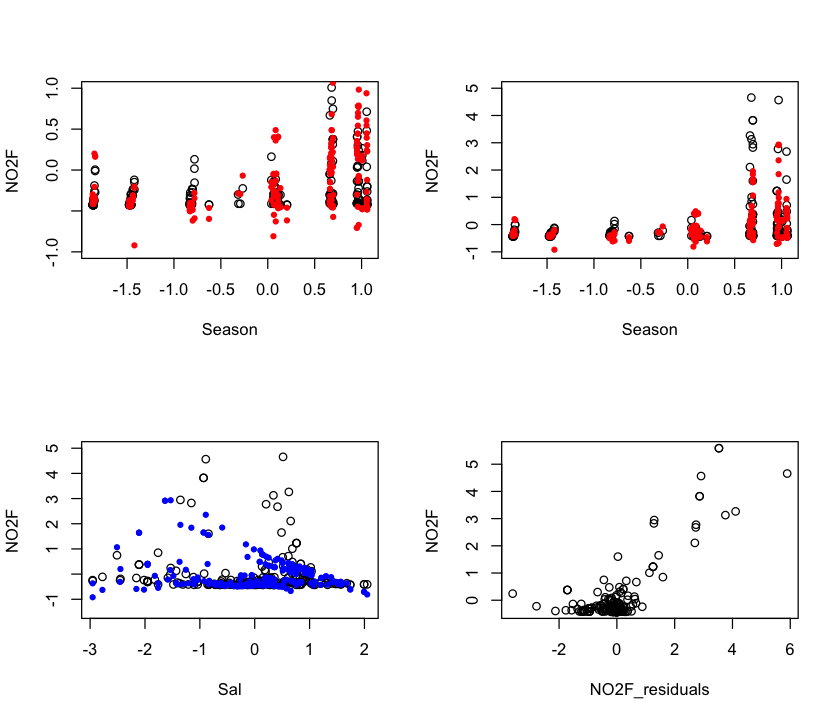

In [12]:
loessMod2 <- suppressWarnings(loess(NO2F ~ Season+WCP+Sal, data=orig_data2, span=0.75))
sum(loessMod2$residuals^2)

orig_data2[,'NO2F_residuals'] <- scale(loessMod2$residuals)

smoothedNO2F <- predict(loessMod2)
options(repr.plot.width=7, repr.plot.height=6)
par(mfrow=c(2,2))

with(orig_data2, plot(Season, NO2F, ylim=c(-1, 1)))
points(smoothedNO2F, x=orig_data2$Season, col="red", pch=20)
with(orig_data2, plot(Season, NO2F, ylim=c(-1, 5)))
points(smoothedNO2F, x=orig_data2$Season, col="red", pch=20)
with(orig_data2, plot(Sal, NO2F, ylim=c(-1.5,5)))
points(smoothedNO2F, x=orig_data2$Sal, col="blue", pch=20)

with(orig_data2, plot(NO2F_residuals, NO2F))


cor(orig_data2[c('NO2F_residuals', 'NO2F')])

[1] 69.95147

,PO4F_residuals,PO4F
PO4F_residuals,1.000000,0.644356
PO4F,0.644356,1.000000


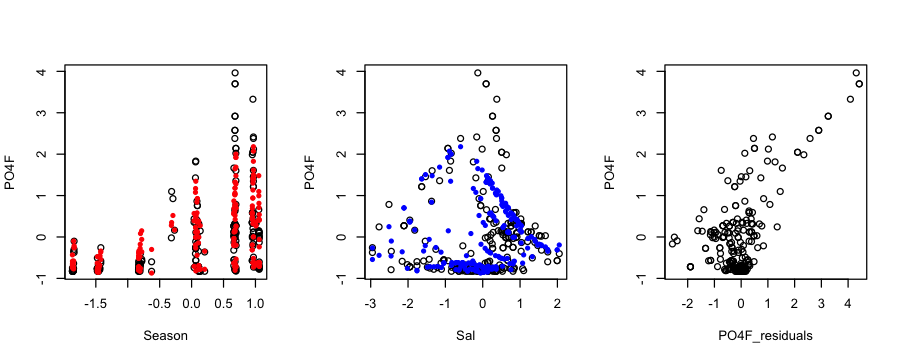

In [14]:
loessMod3 <- suppressWarnings(loess(PO4F ~ Season+WCP+Sal, data=orig_data2, span=0.75))
sum(loessMod3$residuals^2)
orig_data2[,'PO4F_residuals'] <- scale(loessMod3$residuals)

options(repr.plot.width=7.5, repr.plot.height=3.)
par(mfrow=c(1,3))

smoothedPO4F1 <- predict(loessMod3)
with(orig_data2, plot(Season, PO4F))
points(smoothedPO4F1, x=orig_data2$Season, col="red", pch=20)

with(orig_data2, plot(Sal, PO4F))
points(smoothedPO4F1, x=orig_data2$Sal, col="blue", pch=20)

with(orig_data2, plot(PO4F_residuals, PO4F))
cor(orig_data2[c('PO4F_residuals', 'PO4F')])

Read in environmental data, including transformed, original, and residuals

In [23]:
env_responses = orig_data2
env_responses$CHLA <- NULL
unique(env_responses$WCP)
env_responses$WCP <- factor(env_responses$WCP)
# assemble response set
cbind.data.frame(apply(env_responses[,req_cols[2:9]], MAR=2, FUN=mean), 
                 apply(env_responses[,req_cols[2:9]], MAR=2, FUN=sd))

[1] 0 1

,"apply(env_responses[, req_cols[2:9]], MAR = 2, FUN = mean)","apply(env_responses[, req_cols[2:9]], MAR = 2, FUN = sd)"
,<dbl>,<dbl>
PAR60,1.439130e-16,1
Season,-3.001920e-17,1
Sal,-2.628511e-16,1
DO,-9.764796e-17,1
PO4F,-5.472817e-17,1
NO2F,9.836071e-18,1
Latitude,-3.345486e-15,1
LinearTime,2.332732e-17,1


In [24]:
data_objects = list()
rar_df = read.delim('../data/otu_tables/final_unrarefied_table.2.txt', row.names=1, sep="\t")[rownames(env_responses),]
rar_df = rar_df[which(rowSums(rar_df) > 0), which(colSums(rar_df) > 0)]
ra_rar_df = ((rar_df / rowSums(rar_df))*1e6)
data_objects[['Raw.ASVs']] = ra_rar_df

In [ ]:
# Load data and fix OEUs
oeu_file = '../data/oeu_clusters/oeu_abundances.txt'
fxn_file = "../data/faprotax_data/function_abundances.txt"
taxa_file = '../data/otu_tables/taxa_family_abundances.txt'

data_files = list('Taxa.Family'=taxa_file, 'Fxn.SILVA'=fxn_file, 'ASV.OEU'=oeu_file)
for (i in names(data_files)){
    temp_frame = read.delim(data_files[[i]], row.names=1)[rownames(env_responses),]
    data_objects[[i]] = temp_frame[which(rowSums(temp_frame) > 0), which(colSums(temp_frame) > 0)]
    print(colnames(data_objects[[i]])[1:3])
    print(c(dim(data_objects[[i]]), dim(temp_frame)))
}

# remove functions w/ >.95 correlation to other similarly named functions)
to_drop = c('methylotrophy', 'aerobic_ammonia_oxidation', 'sulfate_respiration',
            'dark_sulfite_oxidation', 'arsenate_respiration', 'nitrite_ammonification',
            'dissimilatory_arsenate_reduction', 'nitrite_denitrification', 
            'nitrous_oxide_denitrification', 'nitrate_denitrification', 'fumarate_respiration',
            'mammal_gut', 'plant_pathogen',  'cyanobacteria', 'phototrophy', 
            'anoxygenic_photoautotrophy_S_oxidizing', 'anoxygenic_photoautotrophy_Fe_oxidizing',
            'nitrate_respiration', 'aliphatic_non_methane_hydrocarbon_degradation', 
            'aerobic_chemoheterotrophy', 'nitrite_respiration', 'dark_sulfide_oxidation')

data_objects[['Fxn.SILVA']] = data_objects[['Fxn.SILVA']][,which(!(colnames(data_objects$Fxn.SILVA) %in% to_drop))]
dim(data_objects[['Raw.ASVs']])

In [ ]:
numCores <- 3
counter = 0
folds = 10

score_summaries = paste(names(data_objects), 'Rsq', sep=".")
intercepts = paste(names(data_objects), '(Intercept)', sep=".")
predictor_list = unlist(lapply(data_objects, colnames))
names(predictor_list) <-NULL
all_summaries = c(score_summaries, intercepts, predictor_list)
vs_trial_df = data.frame(matrix(nrow=ncol(env_responses), ncol=length(all_summaries)))
rownames(vs_trial_df) = colnames(env_responses)
colnames(vs_trial_df) = all_summaries
dim(vs_trial_df)

In [ ]:
library(caret)
resid_res_file = '/Volumes/KeithSSD/ChesapeakeMicrobiome/data/residual_analysis/responsive_populations_intercept.RData'

if (file.exists(resid_res_file)) {
    load(resid_res_file)
    print('Loaded residual results')
} else {
    suppressPackageStartupMessages(library(glmnet))
    #suppressPackageStartupMessages(library(doParallel))
    #registerDoParallel(3)
    start_time = Sys.time()
    
    for (trial in names(data_objects)){
        # extract predictor matrix
        predictors.t = as.matrix(data_objects[[trial]])
        pred_cols = colnames(predictors.t)
        print(c("Trial", trial))
    
        for (resp in colnames(env_responses)){
            # set seed by counter
            counter = counter + 1
            response.t = env_responses[,resp]
            names(response.t) <- rownames(env_responses)
            for (split.i in 1:folds) {
                this_counter = counter + split.i
                set.seed(this_counter)
                train_idx = createDataPartition(response.t, p=.75)[['Resample1']]
                test_idx = setdiff(1:nrow(predictors.t), train_idx)
                predictors.t.tr <- predictors.t[train_idx, ]; 
                predictors.t.tst <- predictors.t[test_idx, ]; 
                response.t.tr <- response.t[train_idx]
                response.t.tst <- response.t[test_idx]
                
                cvfit.tr <- cv.glmnet(x=predictors.t.tr, y=response.t.tr, family = "gaussian", 
                                      nfolds = 5, parallel = F, intercept=F, alpha=1)
                
                # predict on held out data
                fitted_values.tst = predict(cvfit.tr, newx=predictors.t.tst, s = 'lambda.min')
                rsq.tst = postResample(fitted_values.tst, response.t.tst)['Rsquared']
                rsq.tst = matrix(rsq.tst, nrow=1,ncol=1, 
                                 dimnames=list(c(paste(trial,'Rsq',sep=".")), c(split.i)))
                coef.tr = as.matrix(coef(cvfit.tr, s = "lambda.min"))
                colnames(coef.tr) <- c(split.i)
                if (split.i == 1) {
                    fold.scores = rbind(coef.tr, rsq.tst)
                } else {
                    fold.scores = cbind(fold.scores, rbind(coef.tr, rsq.tst))
                }
            }
            # move counter forward to initiate new seeds 
            counter = counter + folds
            folded.scores = apply(fold.scores, 1, function(x) {mean(x, na.rm=T)})
            na_count = sum((colSums(is.na(fold.scores))))
            # give the intercept a model specific name 
            names(folded.scores)[names(folded.scores) == '(Intercept)'] = paste(trial, '(Intercept)', sep=".")
            vs_trial_df[resp, names(folded.scores)] = folded.scores            
            progress_meter = counter/(nrow(vs_trial_df)*(folds+1)*length(data_objects))
            end_time = Sys.time();
            print(paste('Complete: ', round(progress_meter*100, 1), "%, Nulls: ", na_count, sep="" ))
            print(end_time - start_time);
            flush.console()
        }
    }
    #stopImplicitCluster()
    save(vs_trial_df, file=resid_res_file)
    print('Saved residual results')
}

In [ ]:
library(reshape2)
library(ggplot2)
options(repr.plot.width=7.5, repr.plot.height=5)
to_plot1 = t(vs_trial_df[,1:length(data_objects)])
to_plot2 = melt(to_plot1, measure.vars=colnames(to_plot1), variable.name='Variable',
                value.name='Error')

colnames(to_plot2) <- c("Predictor", 'Response', 'Rsq')
to_plot2[,'Predictor'] = factor(unlist(strsplit(as.character(to_plot2[,'Predictor']), split='.Rsq', fixed=TRUE)))

bp <- ggplot(to_plot2, aes(x=Response, y=Rsq, fill=Predictor)) + 
      geom_bar(stat="identity", position=position_dodge()) + 
      theme(axis.text.x = element_text(angle = 45, hjust = 1))

bp

In [ ]:
taxa_file = '../data/otu_tables/taxa_table_with_OTUs.txt'
taxa_df_pre = read.delim(taxa_file, row.names=1) 
taxa_df = apply(taxa_df_pre, 2, as.character)
rownames(taxa_df) <- rownames(taxa_df_pre)

taxa_df[taxa_df == ''] <- NA

faprotax_file = "../data/faprotax_data/report_silva.txt"
faprotax_df = read.delim("../data/faprotax_data/report_silva.txt", row.names=1, comment.char='#')
faprotax_df = faprotax_df[colnames(data_objects[['Raw.ASVs']]),]

aerobic_proc = c('aerobic_ammonia_oxidation', 'aerobic_nitrite_oxidation', 'nitrification',
                 'knallgas_bacteria', 'aerobic_chemoheterotrophy', 'oxygenic_photoautotrophy',
                 'aerobic_anoxygenic_phototrophy')

nitrogen_proc = c('nitrate_denitrification', 'nitrite_denitrification', 'nitrous_oxide_denitrification', 
                  'denitrification', 'nitrogen_fixation', 'nitrate_ammonification', 'nitrite_ammonification',
                  'nitrite_respiration', 'nitrate_respiration', 'nitrate_reduction',  'nitrogen_respiration',
                  'aerobic_ammonia_oxidation', 'aerobic_nitrite_oxidation', 'nitrification')

anaerobic_proc = c('acetoclastic_methanogenesis', 'methanogenesis_by_disproportionation_of_methyl_groups', 
                   'methanogenesis_using_formate', 'methanogenesis_by_CO2_reduction_with_H2', 
                   'methanogenesis_by_reduction_of_methyl_compounds_with_H2', 'hydrogenotrophic_methanogenesis',
                   'methanogenesis', 'sulfate_respiration', 'sulfur_respiration', 'dark_sulfite_oxidation',
                   'sulfite_respiration', 'thiosulfate_respiration', 'respiration_of_sulfur_compounds',
                   'arsenate_respiration', 'anammox', 'nitrate_denitrification', 'nitrite_denitrification',
                   'nitrous_oxide_denitrification', 'denitrification', 'nitrate_ammonification',
                   'nitrite_ammonification', 'nitrite_respiration', 'manganese_respiration', 'fermentation',
                   'iron_respiration', 'nitrate_respiration', 'nitrogen_respiration', 'fumarate_respiration',
                   'reductive_acetogenesis')


function_categories = list('nitrogen_based' = nitrogen_proc, 
                           'anaerobic' = anaerobic_proc,
                           'aerobic' =  aerobic_proc)
otus_per_function = list()

for (func_cat in names(function_categories)){
    otu_hits = c()
    for (n in function_categories[[func_cat]]){
        sliceN = rownames(faprotax_df)[faprotax_df[,n] > 0]
        otu_hits = unique(c(otu_hits, sliceN))
        print(c(n, length(otu_hits)))
    }
    otus_per_function[[func_cat]] = otu_hits
}

length(intersect(otus_per_function$nitrogen_based, otus_per_function$other_anaerobic))
length(setdiff(otus_per_function$other_anaerobic, otus_per_function$nitrogen_based))
length(union(otus_per_function$nitrogen_based, otus_per_function$other_anaerobic))

In [ ]:
abund_mult1 <- function(lset, trial){
    lsetnew = c()
    for (n in names(lset)){lsetnew[n] = mean(data_objects[[trial]][,n])*lset[n]}
    lsetnew
}

trends_n_vars = c('Latitude', 'Seasonality', 'DO', 'DO_residuals', 'NO2F', 'NO2F_residuals', 'PO4F', 
                  'PO4F_residuals')

reordered_results = list()
for (trial in names(data_objects)[1:3]){
    microbes = colnames(data_objects[[trial]])
    counter = 1
    comp_plot_sets = data.frame('Direction'=c(), 'Variable'=c(), 'OTU'=c(), 'Value'=c())
    for (factor in trends_n_vars){
        coefs_ = t(vs_trial_df[factor, microbes])
        valsets = list('Pos' = base::sort(abund_mult1(coefs_[(coefs_[,1] > 0),], trial), decreasing=T), 
                       'Neg' = base::sort(abund_mult1(coefs_[(coefs_[,1] < 0),], trial), decreasing=F))
        
        valsets[['Pos']] = valsets[['Pos']] / sum(valsets[['Pos']])
        valsets[['Neg']] = valsets[['Neg']] / sum(valsets[['Neg']])
        
        for (n_v in names(valsets)){
            for (otu_h in names(valsets[[n_v]])){
                comp_plot_sets[counter, 'Direction'] = n_v
                comp_plot_sets[counter, 'Variable'] = factor
                comp_plot_sets[counter, 'OTU'] = otu_h
                comp_plot_sets[counter, 'Value'] = valsets[[n_v]][otu_h]
                counter = counter + 1
            }
        }
        
        message(paste(trial, ": ", factor, " +", length(valsets[['Pos']]), " -", length(valsets[['Neg']]), sep=""))
        
        for (rank_ in 1:15){
            print(paste(factor, 'POS', rank_, names(valsets[['Pos']])[rank_], round(valsets[['Pos']][rank_], 5), sep="    "))
        }
        print(paste(paste(rep('0', 15), rep('1', 15), sep=""), collapse=""))
        
        for (rank_ in 1:15){
            print(paste(factor, 'NEG', rank_, names(valsets[['Neg']])[rank_], round(valsets[['Neg']][rank_], 5), sep="    "))
        }
        print(paste(paste(rep('*', 30), rep('-', 30), sep=""), collapse=""))
    }
    
    comp_plot_sets[,'Variable'] = factor(comp_plot_sets[,'Variable'])
    comp_plot_sets[,'Direction'] = factor(comp_plot_sets[,'Direction'])
    reordered_results[[trial]] = comp_plot_sets
}

reordered_results[['Raw.ASVs']] = merge(reordered_results[['Raw.ASVs']], taxa_df, by.x="OTU", by.y="row.names")


In [ ]:
mot_fxn = reordered_results[['Fxn.SILVA']]
aerobic = ((mot_fxn$Direction == 'Neg') & (mot_fxn$Variable %in% c('DO')))
sum(aerobic)
aerobic = (aerobic) | ((mot_fxn$Direction == 'Pos') & (mot_fxn$Variable %in% c('PO4F')))
sum(aerobic)
nonaerob = (mot_fxn$OTU %in% anaerobic_proc)
sum(nonaerob)
print("Number of unique anaerobic processes in hypoxic samples (raw)")
nrow(unique(mot_fxn[which(aerobic & nonaerob),]))

aerobic = ((mot_fxn$Direction == 'Neg') & (mot_fxn$Variable %in% c('DO_residuals')))
sum(aerobic)
aerobic = (aerobic) | ((mot_fxn$Direction == 'Pos') & (mot_fxn$Variable %in% c('PO4F_residuals')))
sum(aerobic)
sum(nonaerob)

print("Number of unique anaerobic processes in hypoxic samples (detrended)")
nrow(unique(mot_fxn[which(aerobic & nonaerob),]))



In [ ]:
mot_fxn = reordered_results[['Fxn.SILVA']]
aerobic = ((mot_fxn$Direction == 'Neg') & (mot_fxn$Variable %in% c('DO')))
sum(aerobic)
aerobic = (aerobic) | ((mot_fxn$Direction == 'Pos') & (mot_fxn$Variable %in% c('PO4F')))
sum(aerobic)
aerobFxn = (mot_fxn$OTU %in% aerobic_proc)
sum(aerobFxn)

mot_fxn[which(aerobic & aerobFxn), ]

aerobic = ((mot_fxn$Direction == 'Neg') & (mot_fxn$Variable %in% c('DO_residuals')))
sum(aerobic)
aerobic = (aerobic) | ((mot_fxn$Direction == 'Pos') & (mot_fxn$Variable %in% c('PO4F_residuals')))
sum(aerobic)
sum(aerobFxn)

mot_fxn[which(aerobic & aerobFxn), ]

In [ ]:
nitrogenous = (mot_fxn$Variable %in% c('NO2F'))
nitrofxn = (mot_fxn$OTU %in% nitrogen_proc)
mot_fxn[which(nitrogenous & nitrofxn),]

nitrogenous = (mot_fxn$Variable %in% c('NO2F_residuals'))
mot_fxn[which(nitrogenous & nitrofxn),]

In [ ]:
plot(data_objects$Fxn.SILVA$aerobic_nitrite_oxidation, data_objects$Fxn.SILVA$nitrification)

In [ ]:
# addalpha()
addalpha <- function(colors, alpha=0.6) {
  r <- col2rgb(colors, alpha=T)
  # Apply alpha
  r[4,] <- alpha*255
  r <- r/255.0
  return(rgb(r[1,], r[2,], r[3,], r[4,]))
}

# colorRampPaletteAlpha()
colorRampPaletteAlpha <- function(colors, n=32, interpolate='linear') {
  # Create the color ramp normally
  cr <- colorRampPalette(colors, interpolate=interpolate)(n)
  # Find the alpha channel
  a <- col2rgb(colors, alpha=T)[4,]
  # Interpolate
        if (interpolate=='linear') {
            l <- approx(a, n=n)
        } else {
            l <- spline(a, n=n)
        }
        l$y[l$y > 255] <- 255 # Clamp if spline is > 255
        cr <- addalpha(cr, l$y/255.0)
        return(cr)
}


In [ ]:
options(repr.plot.width=5, repr.plot.height=4)
fxn_thresh = 0.02
mot_fxn = reordered_results[['Fxn.SILVA']]
length(unique(mot_fxn[which(mot_fxn$Value > fxn_thresh), 'OTU']))
mot_fxn = mot_fxn[which(mot_fxn$Value > fxn_thresh), ]
hist(mot_fxn$Value, breaks=seq(from=0, to=1., by=0.01))

In [ ]:
library(plyr)
library(dplyr)
library(forcats)
library(RColorBrewer)
library(grid)

mot_fxn$Variable <- factor(mot_fxn$Variable, levels=c('Latitude', 'Seasonality', 'NO2F', 
                                              'NO2F_residuals', 'PO4F', 'PO4F_residuals', 
                                              'DO', 'DO_residuals'))
new_levels = c()
for (l in levels(mot_fxn$Variable)){
    for (d in levels(mot_fxn$Direction)){
        new_levels = c(new_levels, paste(d, l, sep="."))
    }
}
mot_fxn$ResponsePole <- factor(paste(as.character(mot_fxn$Direction), as.character(mot_fxn$Variable), sep="."), 
                           levels=new_levels)
# make a color palette
n.colors <- length(unique(mot_fxn$OTU))
my.colors <- colorRampPaletteAlpha(brewer.pal(9, "Set1"), n=n.colors)

options(repr.plot.width=7.5, repr.plot.height=7.5)
# make the base plot
p <- ggplot(mot_fxn, aes(x=ResponsePole, y=Value)) +
     geom_bar(stat='identity', color='black', aes(fill=OTU)) +
     scale_fill_manual(values=my.colors)

# beautify the plot with a stripped-down theme and nicer limits & labels
p + theme_bw() + ylim(0, 1) +
  xlab("Direction.Response") + ylab("Relative Abundance") +
  theme(legend.key.size=unit(0.15, 'inches'), legend.text=element_text(size=rel(0.65)),
        panel.grid.major.y=element_blank(), panel.grid.minor.y=element_blank(),
        panel.grid.major.x=element_blank(), panel.grid.minor.x=element_blank(),
        legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) + 
        guides(fill=guide_legend(nrow=12, byrow=TRUE))



In [ ]:
options(repr.plot.width=5, repr.plot.height=4)
tax_thresh = 0.09
mot_tax = reordered_results[['Taxa.Family']]
mot_tax[,'OTU'] <- unlist(lapply(mot_tax$OTU, function(x) {paste(strsplit(x, '.', fixed=T)[[1]][2:(sum(charToRaw(x) == charToRaw('.')) + 1)], collapse=".")}))
length(unique(mot_tax[which(mot_tax$Value > tax_thresh), 'OTU']))
mot_tax = mot_tax[which(mot_tax$Value > tax_thresh),]
hist(mot_tax$Value, breaks=seq(from=0, to=1., by=0.01))

In [ ]:
mot_tax$Variable <- factor(mot_tax$Variable, levels=c('Latitude', 'Seasonality', 'NO2F', 
                                              'NO2F_residuals', 'PO4F', 'PO4F_residuals', 
                                              'DO', 'DO_residuals'))
new_levels = c()
for (l in levels(mot_tax$Variable)){
    for (d in levels(mot_tax$Direction)){
        new_levels = c(new_levels, paste(d, l, sep="."))
    }
}
mot_tax$ResponsePole <- factor(paste(as.character(mot_tax$Direction), as.character(mot_tax$Variable), sep="."), 
                           levels=new_levels)
# make a color palette
n.colors <- length(unique(mot_tax$OTU))
my.colors <- colorRampPaletteAlpha(brewer.pal(9, "Set1"), n=n.colors)

options(repr.plot.width=7.5, repr.plot.height=7.5)
# make the base plot
p <- ggplot(mot_tax, aes(x=ResponsePole, y=Value)) +
     geom_bar(stat='identity', color='black', aes(fill=OTU)) +
     scale_fill_manual(values=my.colors)

# beautify the plot with a stripped-down theme and nicer limits & labels
p + theme_bw() + ylim(0, 1) +
  xlab("Direction.Response") + ylab("Relative Abundance") +
  theme(legend.key.size=unit(0.18, 'inches'), legend.text=element_text(size=rel(0.65)),
        panel.grid.major.y=element_blank(), panel.grid.minor.y=element_blank(),
        panel.grid.major.x=element_blank(), panel.grid.minor.x=element_blank(),
        legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) + 
        guides(fill=guide_legend(nrow=12, byrow=TRUE))

In [ ]:
relavent_functions = unique(c(anaerobic_proc, aerobic_proc, nitrogen_proc))
length(relavent_functions)

In [ ]:
comp_plot_sets2 = cbind(reordered_results[['Raw.ASVs']])
comp_plot_sets2[,'FAPROTAX.Function'] <- NA

counter = nrow(comp_plot_sets2)
init_counter = nrow(comp_plot_sets2)
dim(comp_plot_sets2)
for (idx_i in 1:init_counter){
    # pull otu name
    otu_i = comp_plot_sets2[idx_i, 'OTU']
    # pull annotations fxns
    rel_fxns_i = colnames(faprotax_df)[faprotax_df[otu_i,] > 0]
    # 
    if (length(rel_fxns_i) > 0)
        comp_plot_sets2[idx_i ,'FAPROTAX.Function'] = rel_fxns_i[1]
    if (length(rel_fxns_i) > 1) {
        for (idx_ii in 2:length(rel_fxns_i)){
            counter = counter + 1
            comp_plot_sets2[counter, colnames(comp_plot_sets)] = comp_plot_sets2[idx_i, colnames(comp_plot_sets)]
            comp_plot_sets2[counter, 'FAPROTAX.Function'] = rel_fxns_i[idx_ii]
        }
    }
}

dim(comp_plot_sets2)

sum(is.na(comp_plot_sets2[,'FAPROTAX.Function']))
head(comp_plot_sets2)

In [ ]:
comp_plot_sets3 = cbind(reordered_results[['Raw.ASVs']])
wide_fam = dcast(comp_plot_sets3, Direction + Variable ~ Order, fun.aggregate=sum, value.var='Value')
dim(wide_fam)
wide_fam[,3:ncol(wide_fam)] = wide_fam[,3:ncol(wide_fam)]/rowSums(wide_fam[,3:ncol(wide_fam)])
dim(wide_fam)
pre_comp_plot_fam = melt(wide_fam, id.vars=c('Direction', 'Variable'), 
                     measure.vars=colnames(wide_fam)[3:ncol(wide_fam)], 
                     variable.name = 'Order', value.name="Abundance")

dim(pre_comp_plot_fam)
comp_plot_fam = pre_comp_plot_fam[which(pre_comp_plot_fam$Abundance > 0.06),]
cat_level = names(base::sort(colMeans(wide_fam[,levels(comp_plot_fam[,'Order'])]), decreasing=F))
comp_plot_fam[,'Order'] = droplevels(factor(comp_plot_fam[,'Order'], levels=cat_level))
dim(comp_plot_fam)
length(levels(droplevels(comp_plot_fam[,'Order'])))
options(repr.plot.width=5, repr.plot.height=5)
hist(comp_plot_fam$Abundance, breaks=seq(from=0, to=1., by=0.01))


In [ ]:
mot = comp_plot_fam
mot$Variable <- factor(mot$Variable, levels=c('Latitude', 'Seasonality', 'NO2F', 
                                              'NO2F_residuals', 'PO4F', 'PO4F_residuals', 
                                              'DO', 'DO_residuals'))
new_levels = c()
for (l in levels(mot$Variable)){
    for (d in levels(mot$Direction)){
        new_levels = c(new_levels, paste(d, l, sep="."))
    }
}
mot$ResponsePole <- factor(paste(as.character(mot$Direction), as.character(mot$Variable), sep="."), 
                           levels=new_levels)

# make a color palette
n.colors <- length(unique(mot$Order))
my.colors <- colorRampPaletteAlpha(brewer.pal(9, "Set1"), n=n.colors)

options(repr.plot.width=7.5, repr.plot.height=7.5)
# make the base plot
p <- ggplot(mot, aes(x=ResponsePole, y=Abundance)) +
     geom_bar(stat='identity', color='black', aes(fill=Order)) +
     scale_fill_manual(values=my.colors)

# beautify the plot with a stripped-down theme and nicer limits & labels
p + theme_bw() + ylim(0, 1) +
  xlab("sample") + ylab("relative abundance") +
  theme(legend.key.size=unit(0.2, 'inches'), legend.text=element_text(size=rel(0.6)),
        panel.grid.major.y=element_blank(), panel.grid.minor.y=element_blank(),
        panel.grid.major.x=element_blank(), panel.grid.minor.x=element_blank(),
        legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) + 
        guides(fill=guide_legend(nrow=10, byrow=TRUE))


In [ ]:
dim(comp_plot_sets2)
head(comp_plot_sets2)
comp_plot_sets2[,'FAPROTAX.Function'] <- factor(comp_plot_sets2[,'FAPROTAX.Function'])
comp_plot_sets4 = comp_plot_sets2[which(!(is.na(comp_plot_sets2[,'FAPROTAX.Function']))),]

wide_fxn = dcast(comp_plot_sets4, Direction + Variable ~ FAPROTAX.Function, fun.aggregate=sum, value.var='Value')

wide_fxn[,3:ncol(wide_fxn)] = wide_fxn[,3:ncol(wide_fxn)] / rowSums(wide_fxn[,3:ncol(wide_fxn)])

pre_comp_plot_fxn = melt(wide_fxn, id.vars=c('Direction', 'Variable'), 
                         measure.vars=colnames(wide_fxn)[3:ncol(wide_fxn)], 
                         variable.name = 'Fxn', value.name="Abundance")
dim(pre_comp_plot_fxn)
comp_plot_fxn = pre_comp_plot_fxn[which(pre_comp_plot_fxn$Abundance > 0.04),]
#comp_plot_fxn$Abundance = comp_plot_fxn$Abundance + 0.02
dim(comp_plot_fxn)
options(repr.plot.width=5, repr.plot.height=5)
hist(comp_plot_fxn$Abundance, breaks=seq(from=0, to=1.03, by=0.01))
length(unique(comp_plot_fxn$Fxn))

In [ ]:
mot = comp_plot_fxn
mot$Variable <- factor(mot$Variable, levels=c('Latitude', 'Seasonality', 'NO2F', 
                                              'NO2F_residuals', 'PO4F', 'PO4F_residuals', 
                                              'DO', 'DO_residuals'))
new_levels = c()
for (l in levels(mot$Variable)){
    for (d in levels(mot$Direction)){
        new_levels = c(new_levels, paste(d, l, sep="."))
    }
}
new_levels
mot$ResponsePole <- factor(paste(as.character(mot$Direction), as.character(mot$Variable), sep="."), 
                           levels=new_levels)

# make a color palette
n.colors <- length(unique(mot$Fxn))
my.colors <- colorRampPaletteAlpha(brewer.pal(9, "Set1"), n=n.colors)

options(repr.plot.width=7.5, repr.plot.height=7)
# make the base plot
p <- ggplot(mot, aes(x=ResponsePole, y=Abundance)) +
     geom_bar(stat='identity', color='black', aes(fill=Fxn)) +
     scale_fill_manual(values=my.colors)

# beautify the plot with a stripped-down theme and nicer limits & labels
p + theme_bw() + ylim(0, 1) +
  xlab("sample") + ylab("relative abundance") +
  theme(legend.key.size=unit(0.2, 'inches'), legend.text=element_text(size=rel(0.7)),
        panel.grid.major.y=element_blank(), panel.grid.minor.y=element_blank(),
        panel.grid.major.x=element_blank(), panel.grid.minor.x=element_blank(),
        legend.position="bottom", axis.text.x = element_text(angle = 45, hjust = 1)) + 
        guides(fill=guide_legend(nrow=6, byrow=TRUE))


In [ ]:
print("The percent ON Target i.e. anaerobic in negative DO or positive PO4F")
aerobic = ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('DO')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('PO4F')))
nonaerob = (pre_comp_plot_fxn$Fxn %in% anaerobic_proc)

print("Raw")
sum(pre_comp_plot_fxn[which(aerobic & nonaerob), 'Abundance'])

aerobic = ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('DO_residuals')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('PO4F_residuals')))
print("Detrended")
sum(pre_comp_plot_fxn[which(aerobic & nonaerob), 'Abundance'])

In [ ]:
print("The percent OFF Target i.e. aerobic in negative DO or positive PO4F")
aerobic = ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('DO')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('PO4F')))
aerobfxn = (pre_comp_plot_fxn$Fxn %in% aerobic_proc)
print("Raw")
sum(pre_comp_plot_fxn[which(aerobic & aerobfxn), 'Abundance'])

aerobic = ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('DO_residuals')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('PO4F_residuals')))
print("Detrended")
sum(pre_comp_plot_fxn[which(aerobic & aerobfxn), 'Abundance'])

In [ ]:
print("The percent reverse ON Target i.e. aerobic in positive DO or negative PO4F")
aerobic = ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('DO')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('PO4F')))
aerobfxn = (pre_comp_plot_fxn$Fxn %in% aerobic_proc)

print("Raw")
sum(pre_comp_plot_fxn[which(aerobic & aerobfxn), 'Abundance'])

aerobic = ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('DO_residuals')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('PO4F_residuals')))

print("Detrended")
sum(pre_comp_plot_fxn[which(aerobic & aerobfxn), 'Abundance'])

In [ ]:
print("The percent reverse off Target i.e. anaerobic in positive DO or negative PO4F")
aerobic = ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('DO')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('PO4F')))
nonaerob = (pre_comp_plot_fxn$Fxn %in% anaerobic_proc)

print("Raw")
sum(pre_comp_plot_fxn[which(aerobic & nonaerob), 'Abundance'])

aerobic = ((pre_comp_plot_fxn$Direction == 'Pos') & (pre_comp_plot_fxn$Variable %in% c('DO_residuals')))
aerobic = (aerobic) | ((pre_comp_plot_fxn$Direction == 'Neg') & (pre_comp_plot_fxn$Variable %in% c('PO4F_residuals')))

print("Detrended")
sum(pre_comp_plot_fxn[which(aerobic & nonaerob), 'Abundance'])

In [ ]:
nitrogenous = (pre_comp_plot_fxn$Variable %in% c('NO2F'))
nitrofxn = (pre_comp_plot_fxn$Fxn %in% nitrogen_proc)
pre_comp_plot_fxn[which(nitrogenous & nitrofxn),]

nitrogenous = (pre_comp_plot_fxn$Variable %in% c('NO2F_residuals'))
pre_comp_plot_fxn[which(nitrogenous & nitrofxn),]

In [ ]:

comp_set = expand.grid(unique(comp_plot_sets$Direction), unique(comp_plot_sets$Variable))
comp_set[,'Var1'] = as.character(comp_set[,'Var1'])
comp_set[,'Var2'] = as.character(comp_set[,'Var2'])
head(comp_set)
overlap_matrix = data.frame()
for (varp1 in 1:nrow(comp_set)){
    varn1 = paste(unlist(comp_set[varp1,]), collapse=".")
    s1p1 = (comp_plot_sets$Variable == comp_set[varp1,'Var2'])
    s1p2 = (comp_plot_sets$Direction == comp_set[varp1,'Var1'])
    selector1 = which(s1p1 & s1p2)
    otuset1 = unique(unlist(comp_plot_sets[selector1, 'OTU']))
    for (varp2 in 1:nrow(comp_set)){
        varn2 = paste(unlist(comp_set[varp2,]), collapse=".")
        s2p1 = (comp_plot_sets$Variable == comp_set[varp2,'Var2'])
        s2p2 = (comp_plot_sets$Direction == comp_set[varp2,'Var1'])
        selector2 = which(s2p1 & s2p2)
        otuset2 = unique(unlist(comp_plot_sets[selector2, 'OTU']))
        overlap_matrix[varn1, varn2] = length(intersect(otuset1, otuset2)) / length(union(otuset1, otuset2))
    }
}




In [ ]:


heatmap(as.matrix(overlap_matrix))

In [ ]:


ftype = intersect(rownames(faprotax_df)[faprotax_df[,'methanogenesis_using_formate'] > 0], colnames(data_objects$Raw.ASVs))
print(c(ftype, sum(ra_rar_df[,ftype])/nrow(ra_rar_df)))
atype = intersect(rownames(faprotax_df)[faprotax_df[,'acetoclastic_methanogenesis'] > 0], colnames(data_objects$Raw.ASVs))
print(c(atype, sum(ra_rar_df[,atype])/nrow(ra_rar_df)))
mtype = intersect(rownames(faprotax_df)[faprotax_df[,'methanogenesis_by_reduction_of_methyl_compounds_with_H2'] > 0], colnames(data_objects$Raw.ASVs))
print(c(mtype, sum(ra_rar_df[,mtype])/nrow(ra_rar_df)))
ctype = intersect(rownames(faprotax_df)[faprotax_df[,'methanogenesis_by_CO2_reduction_with_H2'] > 0], colnames(data_objects$Raw.ASVs))
print(c(ctype, sum(ra_rar_df[,ctype])/nrow(ra_rar_df)))
alltype = intersect(rownames(faprotax_df)[faprotax_df[,'methanogenesis'] > 0], colnames(data_objects$Raw.ASVs))
print(c(alltype, sum(ra_rar_df[,alltype])/nrow(ra_rar_df)))

as.data.frame(taxa_df[ftype,]) %>% distinct()
as.data.frame(taxa_df[atype,]) %>% distinct()
as.data.frame(taxa_df[mtype,]) %>% distinct()
as.data.frame(taxa_df[ctype,]) %>% distinct()
as.data.frame(taxa_df[alltype,]) %>% distinct()

#otu_hits = intersect(sliceN, colnames(data_objects$Raw.ASVs))
#taxa_slice = taxa_df[otu_hits,]# as.data.frame() %>% distinct()
#apply(taxa_slice, 2, function(x) length(unique(x)))
#print(c(n, length(otu_hits), dim(taxa_slice)))

nnegtype = intersect(rownames(faprotax_df)[faprotax_df[,'aerobic_nitrite_oxidation'] > 0], colnames(data_objects$Raw.ASVs))
print(c(nnegtype, sum(ra_rar_df[,nnegtype])/nrow(ra_rar_df)))

as.data.frame(taxa_df[nnegtype,]) %>% distinct()

nitrosos = rownames(taxa_df)[which(taxa_df[,'Family'] == 'Nitrosomonadaceae')]
nitrosos = intersect(nitrosos, colnames(ra_rar_df))

nitroso_abunds = cbind.data.frame(as.data.frame(taxa_df[nitrosos, 'Genus']), colSums(ra_rar_df[,nitrosos]))
colnames(nitroso_abunds) <- c('Genus', 'Total_Abundance')
nitroso_abunds$Total_Abundance <- as.numeric(nitroso_abunds$Total_Abundance)
nitroso_agg = aggregate(nitroso_abunds[,'Total_Abundance'], by=list(nitroso_abunds[,'Genus']), sum)

nitroso_agg$x <- round((nitroso_agg$x/ sum(nitroso_agg$x))*100, 3)
nitroso_agg

